<h1 align = "center" > Recent Romney vs Obama Election Analysis </h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import requests
import io
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/2012-election-obama-vs-romney/Election_Donor_Data.csv
/kaggle/input/2012-election-obama-vs-romney/2012-general-election-romney-vs-obama.csv


In [2]:
data1 = pd.read_csv('/kaggle/input/2012-election-obama-vs-romney/2012-general-election-romney-vs-obama.csv')

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             106 non-null    ob

In [4]:
data1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1


<h1 align = "center" > Comparing Affiliations </h1>

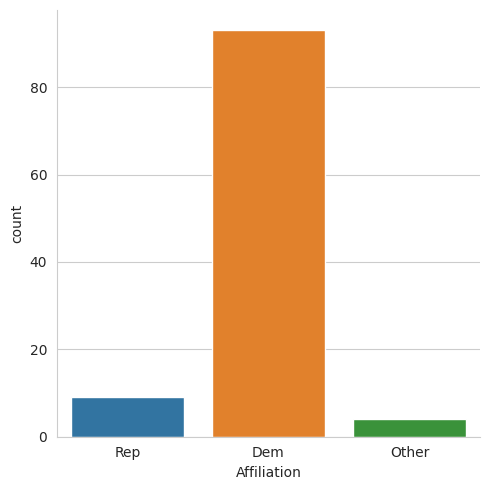

In [5]:
sns.catplot(x = "Affiliation", data=data1, kind='count')

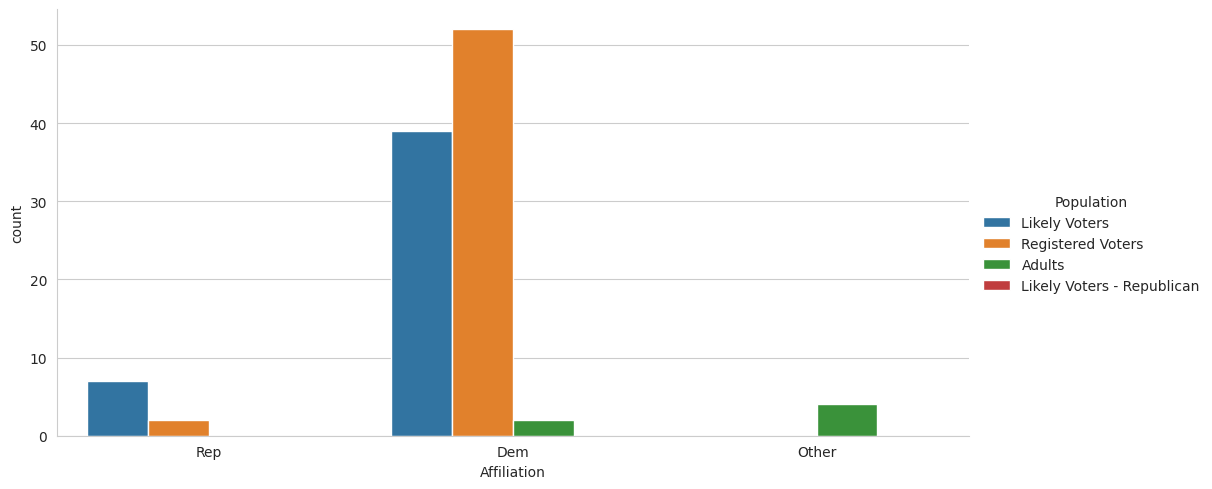

In [6]:
sns.catplot(x='Affiliation',data=data1,kind='count',hue='Population',aspect=2)

In [7]:
data1.Affiliation.value_counts()

Affiliation
Dem      93
Rep       9
Other     4
Name: count, dtype: int64

In [8]:
avg = pd.DataFrame(data1.mean(numeric_only=True))
avg

,0
Number of Observations,1295.390845
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990
Question Text,NaN
Question Iteration,1.000000


In [9]:
avg.drop(['Number of Observations','Question Text','Question Iteration'],axis=0,inplace=True)
avg

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [10]:
std = pd.DataFrame(data1.std(numeric_only=True))
std

,0
Number of Observations,1616.240271
Obama,2.447069
Romney,2.925320
Undecided,3.698614
Other,2.721318
Question Text,NaN
Question Iteration,0.000000


<Axes: >

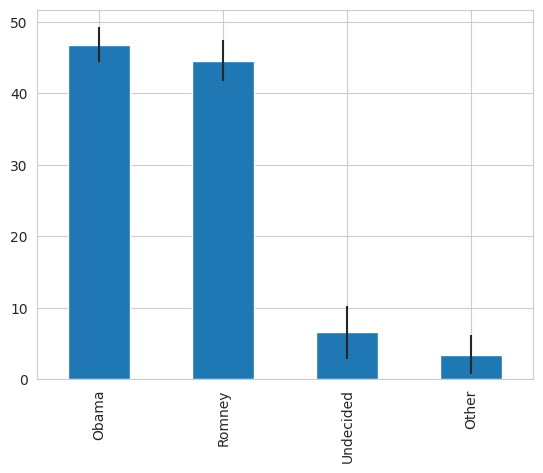

In [11]:
avg.plot(yerr = std,kind = 'bar', legend = False)

In [12]:
avgtab = pd.concat([avg,std], axis=1)
avgtab

,0,0
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Number of Observations,NaN,1616.240271
Question Text,NaN,NaN
Question Iteration,NaN,0.000000


In [13]:
avgtab.columns=['Average','STD']
avgtab

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318
Number of Observations,NaN,1616.240271
Question Text,NaN,NaN
Question Iteration,NaN,0.000000


<Axes: xlabel='End Date'>

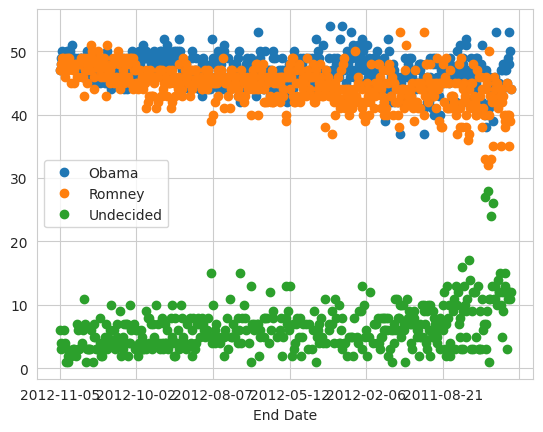

In [14]:
data1.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

<h1 align = "center" >Add a Difference Column</h1>

In [15]:
data1["Difference"] = (data1.Obama - data1.Romney)/100
data1.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,NaN,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,NaN,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,NaN,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,NaN,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,NaN,NaN,1,-0.01


In [16]:
data1=data1.groupby(['Start Date'],as_index=False).mean(numeric_only=True)
data1

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,NaN,1.0,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,NaN,1.0,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,NaN,1.0,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,NaN,1.0,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,NaN,1.0,0.0900
...,...,...,...,...,...,...,...,...,...
356,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1.0,0.0150
357,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1.0,0.0175
358,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1.0,0.0075
359,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1.0,0.0050


<Axes: xlabel='Start Date'>

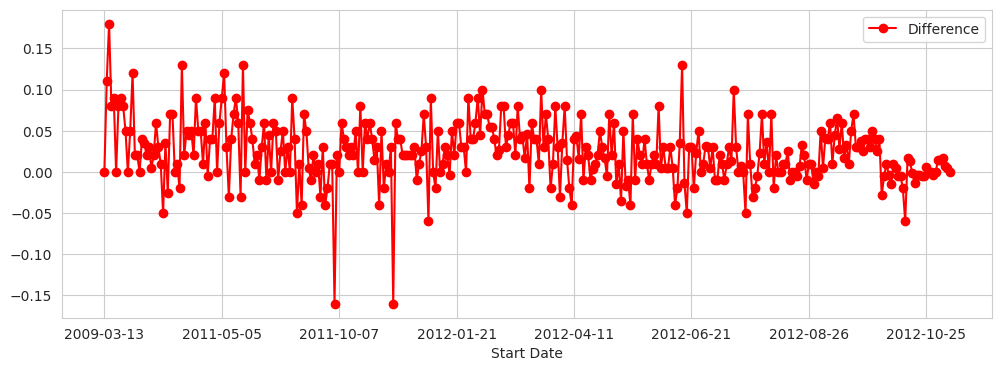

In [17]:
data1.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='red')

<h1 align = "center" >Examining the impact of Debates on Voter Sentiment</h1>

In [18]:
row_in = 0
xlimit = []

for date in data1['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in  += 1

In [19]:
max(xlimit)

356

In [20]:
min(xlimit)

329

<Axes: xlabel='Start Date'>

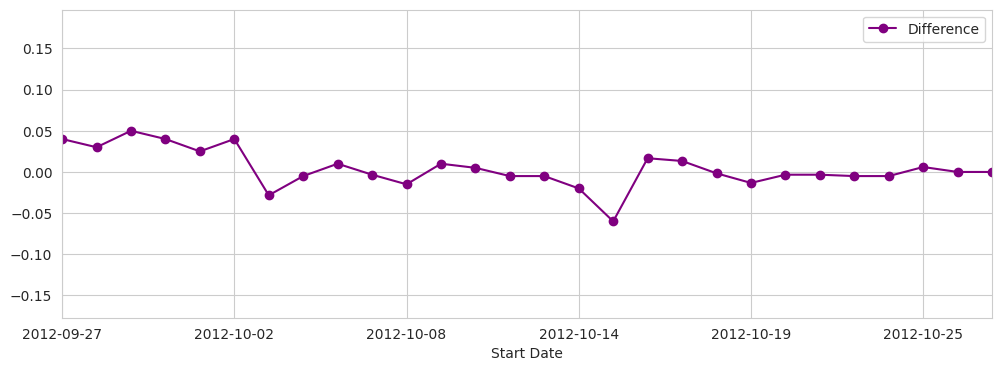

In [21]:
data1.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

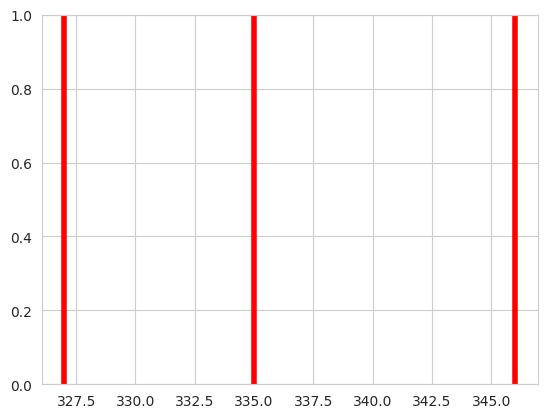

In [22]:
plt.axvline(x=325+2,linewidth=4,color='red')
plt.axvline(x=325+10,linewidth=4,color='red')
plt.axvline(x=325+21,linewidth=4,color='red')

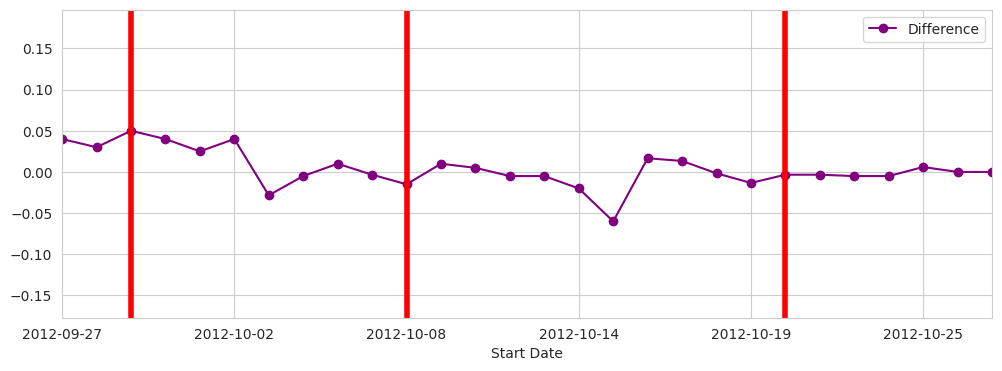

In [23]:
data1.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))
plt.axvline(x=325+2,linewidth=4,color='red')
plt.axvline(x=325+10,linewidth=4,color='red')
plt.axvline(x=325+21,linewidth=4,color='red')

<h1 align = "center" >Plot Debate Dates and their Impacts</h1>